# Random Forest Regression

In [1]:
from functions import *

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

sns.set_theme(style="darkgrid")


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from data_loading import load_data

<AxesSubplot:xlabel='initial_delay', ylabel='ARRIVAL_DELAY'>

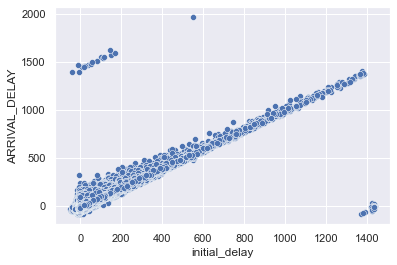

In [2]:
flights_test, flights_train = load_data()

sns.scatterplot(y='ARRIVAL_DELAY', x='initial_delay', data=flights_train)

In [9]:
origin_features =  ['DISTANCE', 'SCHEDULED_TIME', 'initial_delay',
                    'SCHEDULED_ARRIVAL', 'scheduled_departure_timestamp',
                    'TAXI_OUT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
                    'WHEELS_OFF', 'departure_timestamp', 'DAY', 
                    # 'FLIGHT_NUMBER', 'TAIL_NUMBER', 
                    # 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'
                    ]

arrival_delay = 'ARRIVAL_DELAY'

# using the full set for training
training_set = flights_train[origin_features + [arrival_delay]].sample(300000)

# separating the variable that is to be predicted by the model from the rest
X = training_set.drop(arrival_delay, axis=1)
y = training_set[arrival_delay]

features = X.columns

# built a validation set on flights_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training 

In [12]:

rf = RandomForestRegressor(n_estimators=25, max_depth=31, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=31, n_estimators=25, random_state=42)

## Evaluation

In [15]:
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
mean_squared_error = mse(y_test, y_pred)

print("R2: ", round(score, 3))
print("Mean Squared Error: ", round(mean_squared_error, 3))

R2:  0.933
Mean Squared Error:  114.643


## Save Model

In [14]:
import pickle

# save
with open('models/RandomForest.pkl','wb') as f:
    pickle.dump(rf,f)

# load
# with open('models/RandomForest.pkl', 'rb') as f:
#     rf2 = pickle.load(f)

## Creating Submission

In [ ]:
predictions = rf.predict(flights_test)

submission = pd.DataFrame({'id': flights_test['id'], 'ARRIVAL_DELAY': predictions})
submission.to_csv('submission_5.csv', index=False)

# submission must have 514,384 rows
print(len(submission))

## Hyperparameter Tuning

With the help of GridSearch we can try to fine-tune the random forest regression, determining what is the optimal number of trees to get the best score.

Depending on the amount of hyperparameters you can defined in the param_grid, this can take a while...

In [ ]:
param_grid = {
    'n_estimators': [12, 21],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8]
    # 'criterion': ['gini', 'entropy']
}

CV = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)
CV.fit(X_train, y_train)
print(CV.best_params_)
print(CV.best_score_)